# Fruit and Vegetable Freshness Detection using Deep Learning and Computer Vision

_By Michael Angelo Monasterial, Pe Arian Rey, Ron Mikhael Surara, Jedidiah Carl Tan_

### Relevant Links

[Google Colab](https://colab.research.google.com/drive/1XpFiHE_2rodd5SomKYy5eMnFWVuyufbo?usp=sharing) | [GitHub](https://github.com/smtnhacker/ml-fruit-freshness-classifier/blob/main/Group18-Project.ipynb) | [Github (Backend)](https://github.com/Vasallius/fastapi-ml-fruit-server) | [Live Site](https://ml-fruit-freshness-classifier.vercel.app/) | [Experimental Site](https://ml-fruit-freshness-classifier-git-crazy-smtnhacker.vercel.app/)

_Note: Due to the size of the datasets, the Google Colab does not contain the actual data so it is not immediately runnable._

## Project Summary

The goal of this project is to develop an AI model that utilizes computer vision techniques to accurately determine the freshness of various fruits and vegetables. The model will take in an image of a fruit or vegetable and it will classify it as either fresh or rotten in real time. A deep learning model will be used and it will be trained on multiple datasets found online to try and improve existing results. The model can then be used by the average person whenever they want to assess if a fruit or vegetable is still suitable for consumption or not, or by large companies as part of automated systems to ensure that their fruits and vegetables are of good quality.

## Background of the Study

According to the Freshway Foods (n.d.), fresh fruits and vegetables are important in a healthy diet since they contain various essential minerals, vitamins, and other nutrients. Furthermore, consuming a diet rich in fruits and vegetables is said to lower the risk of various diseases, such as cancer. On the other hand, consuming spoiled or rotten fruits or vegetables can lead to illnesses, such as food poisoning (Williams and Selner, 2021). This can lead to symptoms such as nausea and diarrhea. As such, it is important to know whether or not a fruit or vegetable is fresh or not. 

According to Barrett, et. al. (2010), consumers typically assess the quality of a product first using visual inspection, before evaluating the taste, aroma, and texture of the fruit or vegetable. However, manual sorting of fresh produce poses a significant challenge in large scale agriculture industries, leading to inefficiencies and increased waste. With this, automation offers a viable solution by streamlining the sorting process which reduces human errors and ensures accurate separation of spoiled and fresh fruits. This not only saves time but also minimizes waste on a large scale.

Automation can also extend to everyday human life. With machine learning powered applications being slowly accessible, consumers can eventually use their phone to scan a banana to determine if it is ripe or not. Although determining if a fruit is rotten or fresh may not be a problem for the average consumer, it can help a subset of consumers, such as those who are
visually impaired, by improving accessibility in shopping for fruits and vegetables. With the advancement of technology, artificial intelligence has now reached a point where it can efficiently inspect and determine the freshness of fruits, specifically apples and bananas, with high accuracy (Ismail & Malik, 2022).

## Materials and Methodology

### Materials

The dataset used is an aggregated dataset composed of the following datasets:

1. [Fruits fresh and rotten for classification by Sriram Reddy Kalluri](https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

2. [Fruits and Vegetables dataset by Mukhriddin Mukhiddinov](https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset)

3. [Fresh and Stale Images of Fruits and Vegetables by Raghav R Potdar et. al.](https://www.kaggle.com/datasets/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables)

### Methodology

#### Data Collection and Processing

The data set used will be an aggregate of the following data sets obtained from Kaggle. These data sets contain images of various fruits and vegetables and categorize each image as either fresh or rotten. This is aligned with what our model aims to do.

1. Fruits fresh and rotten for classification by Sriram Reddy Kalluri
(https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

2. Fruits and Vegetables dataset by Mukhriddin Mukhiddinov
(https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset)

3. Fresh and Stale Images of Fruits and Vegetables by Raghav R Potdar et. al.
(https://www.kaggle.com/datasets/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables)

This results to a total of around 8gb worth of data, which is a huge improvement over the data set sizes of previous studies. Furthermore, the images of the dataset themselves have been augmented (rotated, flipped). This means that no further image processing for augmentation is needed.

Once the various data sets are obtained, the images are reorganized into two folders: `fresh` and `stale`. Duplicate images will be removed to avoid redundant data and reduce the memory and storage usage. For ease of use, the following paths will be declared.

In [1]:
import os

dataset_dir = './data'
fresh_path = os.path.join(dataset_dir, 'fresh')
stale_path = os.path.join(dataset_dir, 'stale')

To ensure that the images are accessible, show a sample image. Here, we can see a fresh vegetable, and it is already rotated by a few degrees.

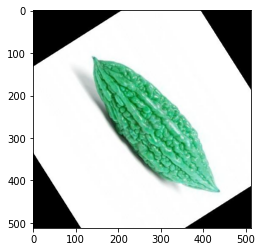

In [2]:
import cv2
import matplotlib.pyplot as plt

plt.imshow(cv2.imread(os.path.join(fresh_path, os.listdir(fresh_path)[0])))

Many models require tensors of the same size. However, since the images are from different sources, it may be possible that they are not uniform in size. To address this, each of the images will be resized to `128x128`. Since the sizes of the images are arbitrary and the CPU has typically more accessible memory than the GPU, the processing will be moved to the CPU. Since the images have three channels, this results to each of the images having `128x128x3=49152` features. No dimensionality reduction will be performed as to the CNN itself find meaningful patterns in the images.

In [3]:
import tensorflow as tf

def preproc(img):
    img = img/255.0
    with tf.device('/cpu:0'):
        img = tf.image.resize(img, [128, 128])
    return img

Collect each of the images and encode their labels accordingly. For this model, fresh fruits will be encoded with a value `0` while stale fruits will be encoded with a value `1`.

In [4]:
def get_data(dir_path, label):
    X = []
    y = []
    
    for filename in os.listdir(dir_path):
        img = cv2.imread(os.path.join(dir_path, filename))
        img = preproc(img)
        X.append(img)
        y.append(label)
    
    return X, y

def get_data_with_labels():
    X_0, y_0 = get_data(dir_path=fresh_path, label=0)
    X_1, y_1 = get_data(dir_path=stale_path, label=1)
    
    X = X_0+X_1
    y = y_0+y_1
    
    return X, y

X, y = get_data_with_labels()

Split the data into three categories: `train`, `test`, and `validate`. To ensure that the model is trained well, allocate most of the data to `train`.

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_t, y_train, y_t = train_test_split(np.array(X), np.array(y), test_size=0.1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size=0.5, stratify=y_t)

Training 8gb worth of data takes time. To make training faster, both CPU and GPU will be used, if possible. However, 8gb is still a lot so it cannot fit into most GPU's memory. To address this problem, create a `DataGenerator` class that only places data into the GPU's memory whenever necessary by using smaller batches. This enables the model to train using more data and train around 9x faster, compared to other studies.

In [6]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x, y, batch_size):
        self.x, self.y = x, y
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = tf.convert_to_tensor(self.x[idx * self.batch_size:(idx + 1) * self.batch_size])
        batch_y = tf.convert_to_tensor(self.y[idx * self.batch_size:(idx + 1) * self.batch_size])
        return batch_x, batch_y

BATCH_SIZE = 16

train_gen = DataGenerator(X_train, y_train, BATCH_SIZE)
test_gen = DataGenerator(X_test, y_test, BATCH_SIZE)
val_gen = DataGenerator(X_val, y_val, BATCH_SIZE)

#### Model Development

The problem requires the use of computer vision to be able to identify whether the fruit or vegetable in an image is fresh or not. Convolutional Neural Networks (or CNN) can be good with these type of problems.

For this project, a `Sequential` Keras model from `TensorFlow` will be used as base. It will consist of four pairs of convolutional2D-max pooling layers of increasing filter sizes, followed by a flattening layer, then by four dense layers with various activation functions. The `LeakyReLU` are used more often than standard `relu` since it is said that the former solves the "dying `ReLU`" problem that may affect the model. A final layer using a `sigmoid` activation function is used to ensure that the output is within the range $[0, 1]$.

This setup was found experimentally until a model with reasonable accuracy was obtained.

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

model = tf.keras.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation=LeakyReLU(alpha=0.02), input_shape=(128, 128, 3), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation=LeakyReLU(alpha=0.01), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(units=32, activation=LeakyReLU(alpha=0.05)))
model.add(Dense(units=32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

Compile the model. For the optimizer, use `Adam`. For the loss and metrics, since an image can either only be fresh or stale, use `binary`.

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['binary_accuracy']
)

Train the model. By testing experimentally, it can be seen that 30 epochs is already nearing convergence.

In [9]:
EPOCHS = 30
model.fit(train_gen, verbose=1, validation_data=val_gen, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
1696/1696 [==============================] - 55s 22ms/step - loss: 0.4612 - binary_accuracy: 0.7662 - val_loss: 0.4053 - val_binary_accuracy: 0.8029
Epoch 2/30
1696/1696 [==============================] - 19s 11ms/step - loss: 0.2987 - binary_accuracy: 0.8690 - val_loss: 0.2717 - val_binary_accuracy: 0.8825
Epoch 3/30
1696/1696 [==============================] - 19s 11ms/step - loss: 0.2271 - binary_accuracy: 0.9048 - val_loss: 0.2036 - val_binary_accuracy: 0.9157
Epoch 4/30
1696/1696 [==============================] - 19s 11ms/step - loss: 0.1754 - binary_accuracy: 0.9290 - val_loss: 0.1556 - val_binary_accuracy: 0.9409
Epoch 5/30
1696/1696 [==============================] - 19s 11ms/step - loss: 0.1414 - binary_accuracy: 0.9437 - val_loss: 0.1465 - val_binary_accuracy: 0.9449
Epoch 6/30
1696/1696 [==============================] - 19s 11ms/step - loss: 0.1201 - binary_accuracy: 0.9530 - val_loss: 0.1451 - val_binary_accuracy: 0.9476
Epoch 7/30
1696/1696 [==================

Save the model for future use.

In [ ]:
model.save('mymodel.h5')

Do multiple tests to evaluate the model. As it can be seen, the model seems to perform well on these tests.

In [10]:
test_img = cv2.imread('rot.jpg')
test_img = preproc(test_img)
test_img = tf.expand_dims(test_img, axis=0)
model.predict(test_img)

1/1 [==============================] - 0s 315ms/step


array([[0.9999784]], dtype=float32)

In [11]:
test_img = cv2.imread('fresh.jpg')
test_img = preproc(test_img)
test_img = tf.expand_dims(test_img, axis=0)
model(test_img)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00160914]], dtype=float32)>

In [12]:
model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 7ms/step - loss: 0.1864 - binary_accuracy: 0.9648


[0.18643221259117126, 0.9648308157920837]

To further analyze the results of the model, use a Classification Report and a Confusion Matrix.

48/48 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       725
           1       0.96      0.97      0.97       782

    accuracy                           0.96      1507
   macro avg       0.97      0.96      0.96      1507
weighted avg       0.96      0.96      0.96      1507



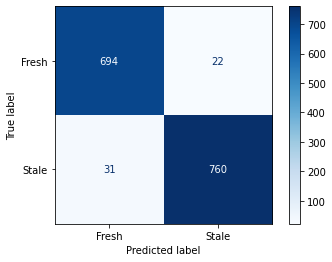

In [13]:
THRESHOLD = 0.4

y_pred = model.predict(X_test)
y_pred = (y_pred.reshape(1,-1)[0] > THRESHOLD).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ["Fresh", "Stale"]

print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Results and Discussion

As it can be seen in the classification report, the model was able to achieve an accuracy of $97\%$ for precision and an accuracy of $96\%$ for recall. As seen in the confusion matrix, out of $716$ fresh images, only $22$ had been mislabeled as stale while out of the $791$ stale images, only $31$ had been mislabeled as fresh. This shows that the model is highly accurate in identifying and classifying fruits as either fresh or stale and it is capable of solving the problem. Using these metrics, the model's result is slightly better than that of previous studies which only has accuracies of $96\%$.

Furthermore, when using the binary accuracy for training, the model has an accuracy of $99.33\%$. This is a vast improvement when compared to the existing study's $96.47\%$. However, the binary accuracy for validation is only $96.48\%$. The difference between the accuracries of the training and testing sets is not large, but this may point to the possibility that the model overfits.

This means that our model may have better results than with previous models, albeit only slightly, but it can also outperform them in other relevant metrics, such as training binary accuracy.

## References

Barret, D. M., Beaulieu, J. C., & Shewfelt, R. (2010, 04 05). Color, flavor, texture, and nutritional quality of fresh-cut fruits and vegetables: desirable levels, instrumental and sensory measurement, and the effects of processing. Critical reviews in food science and nutrition. Critical Reviews in Food Science and Nutrition, 50(5), 369-389.

Ismail, N., & Malik, O. (2022). Real-time visual inspection system for grading fruits using computer vision and deep learning techniques. Information Processing in Agriculture, 9(1), 24-37. https://doi.org/10.1016/j.inpa.2021.01.005

Knicker, M. (2021, February 12). The Strengths and Weaknesses of Visual Inspection. Q-PLUS Labs. Retrieved June 2, 2023, from https://www.qpluslabs.com/blog/the-strengths-and-weaknesses-of-visual-inspection/ 

Nutritional Benefits of Fresh Produce. (n.d.). Freshway Foods. Retrieved June 2, 2023, from https://www.freshwayfoods.com/homepage/our-products/produce-facts/nutritional-benefits/

Selner, M., & Williams, A. (n.d.). Food Poisoning: Symptoms, Causes, and Treatment. Healthline. Retrieved June 2, 2023, from https://www.healthline.com/health/food-poisoning